# Seasonal cycle recipe demo

This notebook illustrates basic usage of the seasonal cycle recipe. 

**Note** that the first example can be run with just the data contained in the tests directory, but the following examples require downloading more data from the NOAA GML Obspack, as described in the gdess README. 
<br>
<br>


**References:**

For further reference, one can explore data visualization similar to these examples in Keppel-Aleks et al. (2013), Figure 5.

*Keppel-Aleks, G., Randerson, J.T., Lindsay, K., Stephens, B.B., Keith Moore, J., Doney, S.C., Thornton, P.E., Mahowald, N.M., Hoffman, F.M., Sweeney, C., Tans, P.P., Wennberg, P.O., Wofsy, S.C., 2013. Atmospheric Carbon Dioxide Variability in the Community Earth System Model: Evaluation and Transient Dynamics during the Twentieth and Twenty-First Centuries. J. Clim. 26, 4447–4475. https://doi.org/10.1175/JCLI-D-12-00589.1*

In [1]:
from co2_diag.recipes import seasonal_cycles

#### A single station

In [2]:
station = 'smo'

recipe_options={'model_name': 'BCC.esm-hist',
                'start_yr': "1980",
                'end_yr': "2015",
                'station_list': station}

*Processing CMIP model output*
[########################################] | 100% Completed |  6.5s
*Processing Observations*
Station 1 of 1: smo
  {'name': 'Tutuila', 'lat': -14.247013, 'lon': 189.43597412109375, 'alts': 57.66138}
Selected bounds for both:
  -- time>=1980  &  time<=2015
Selected bounds for Comparison dataset:
  -- member_id=0
  -- lat=-14.01862217518597
  -- lon=189.0
Applying selected bounds...
[########################################] | 100% Completed | 21.9s
[########################################] | 100% Completed | 22.0s
done.
Done -- 1 stations fully processed. 0 stations skipped.


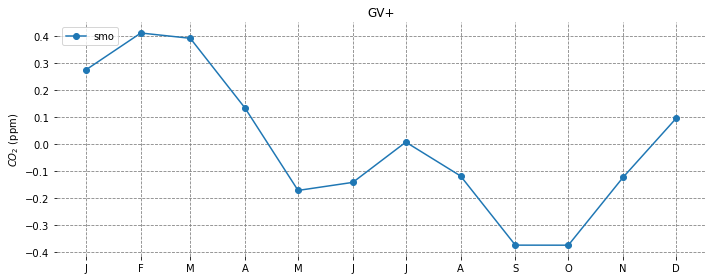

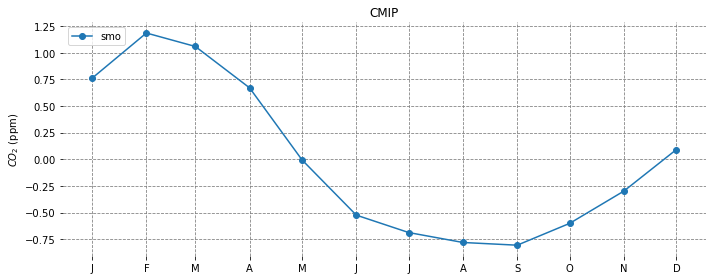

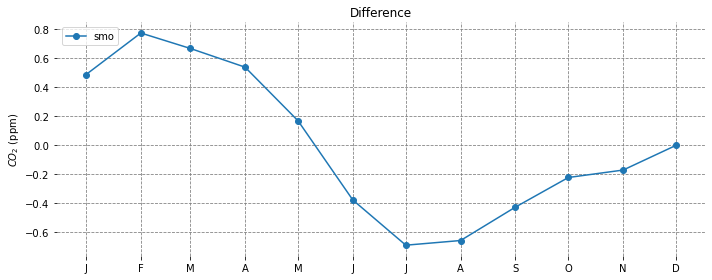

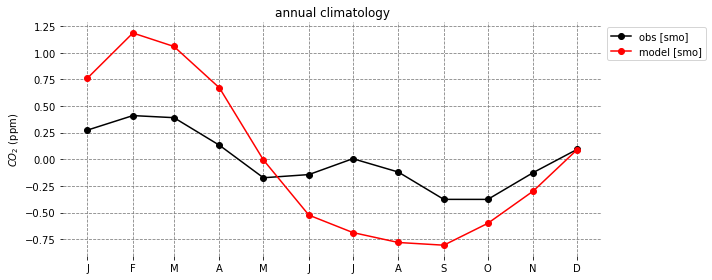

In [3]:
data_dict = seasonal_cycles(recipe_options, verbose='INFO')

**NOTE:** Cells below require downloading the NOAA GML Obspack, as described in the gdess README, because they use station data not included in the repository for testing.

#### Run specific stations

###### with no binning

In [4]:
recipe_options={'model_name': 'GFDL.esm-hist',
                'start_yr': "1980",
                'end_yr': "2015",
                'station_list': 'mlo est brw bnt smo spo'}

*Processing CMIP model output*
[########################################] | 100% Completed |  6.4s
[########################################] | 100% Completed |  6.3s
[########################################] | 100% Completed |  6.3s
*Processing Observations*
Station 1 of 6: mlo
  {'name': 'Mauna Loa, Hawaii', 'lat': 19.535954, 'lon': 204.42391967773438, 'alts': 3436.4846}
Selected bounds for both:
  -- time>=1980  &  time<=2015
Selected bounds for Comparison dataset:
  -- member_id=0
  -- lat=19.5
  -- lon=204.375
Applying selected bounds...
[########################################] | 100% Completed | 23.9s
[########################################] | 100% Completed | 24.0s
[########################################] | 100% Completed | 24.1s
[########################################] | 100% Completed | 24.2s
done.
Station 2 of 6: est
  {'name': 'Esther, Alberta', 'lat': 51.67071, 'lon': 249.79396057128906, 'alts': 751.4054}
Selected bounds for both:
  -- time>=1980  &  time<=2015
Sel

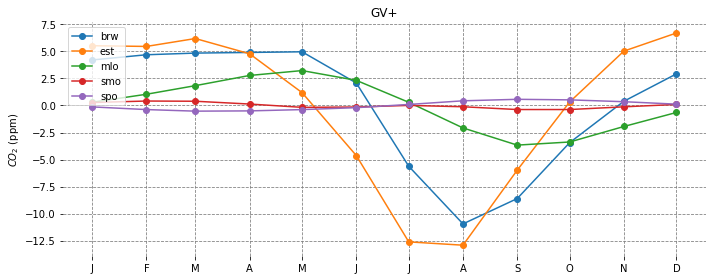

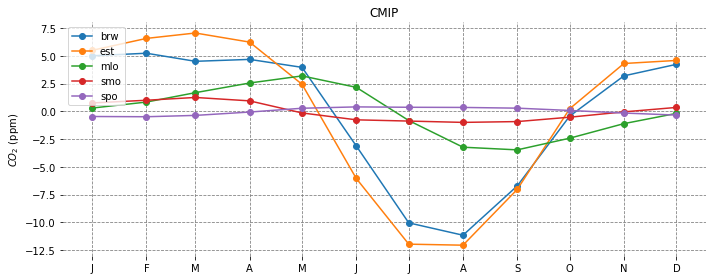

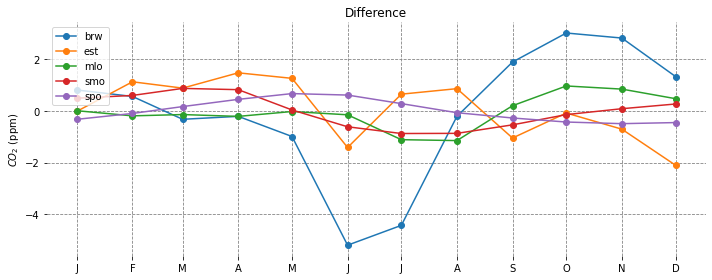

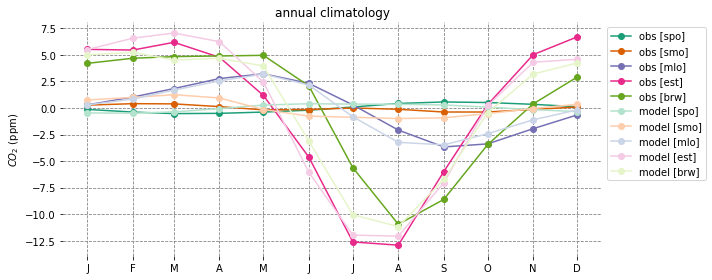

In [5]:
df_all_cycles, cycles_of_each_station, station_metadata = seasonal_cycles(recipe_options, verbose='INFO')

###### with latitudinal binning

In [6]:
recipe_options={'start_yr': "1980",
                'end_yr': "2015",
                'latitude_bin_size': 30,
                'station_list': 'mlo est brw bnt smo spo zep'}

*Processing Observations*
Station 1 of 7: mlo
  {'name': 'Mauna Loa, Hawaii', 'lat': 19.535954, 'lon': 204.42391967773438, 'alts': 3436.4846}
Station 2 of 7: est
  {'name': 'Esther, Alberta', 'lat': 51.67071, 'lon': 249.79396057128906, 'alts': 751.4054}
Station 3 of 7: brw
  {'name': 'Barrow Atmospheric Baseline Observatory', 'lat': 71.32296, 'lon': 203.38917541503906, 'alts': 26.898216}
Station 4 of 7: bnt
  {'name': 'Bennett Island, Russia', 'lat': 76.2, 'lon': 149.5, 'alts': 1058.0952}
  skipping station <bnt>:   insufficient number of months of data for station <bnt>
Station 4 of 6: smo
  {'name': 'Tutuila', 'lat': -14.247013, 'lon': 189.43597412109375, 'alts': 57.66138}
Station 5 of 6: spo
  {'name': 'South Pole, Antarctica', 'lat': -89.979965, 'lon': 335.200008392334, 'alts': 2822.1704}
Station 6 of 6: zep
  {'name': 'Ny-Alesund, Svalbard', 'lat': 78.90704, 'lon': 11.887226, 'alts': 488.5423}
Done -- 6 stations fully processed. 1 stations skipped.


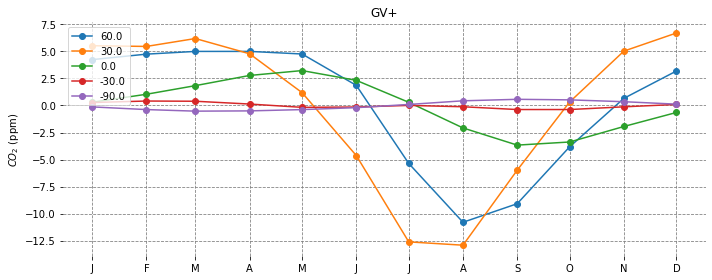

In [7]:
df_all_cycles, cycles_of_each_station, station_metadata = seasonal_cycles(recipe_options, verbose='INFO')